In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
info = np.genfromtxt('PMMA.csv', delimiter=',', skip_header=1)

In [6]:
L, R = 1, 3.6

r, c = (R - L) / 2, (R + L) / 2  # center c and radius r to find range of coeffs we want to view

In [7]:
pmma = info[np.where(np.abs(info[:,0]-c)<r)]

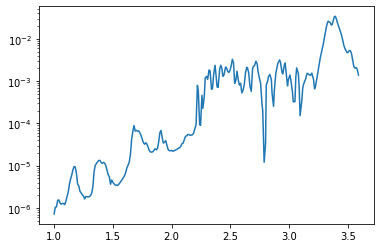

In [8]:
plt.plot(pmma[:,0], pmma[:,2])
plt.yscale('log')

In [9]:
info = np.genfromtxt('PVC.csv', delimiter=',', skip_header=1)

In [10]:
L, R = 1, 3.6

r, c = (R - L) / 2, (R + L) / 2  # center c and radius r to find range of coeffs we want to view

In [11]:
pvc= info[np.where(np.abs(info[:,0]-c)<r)]

In [12]:
np.mean(pvc[:,2])

0.0017559949195402299

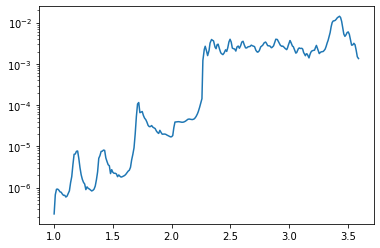

In [13]:
plt.plot(pvc[:,0], pvc[:,2])
plt.yscale('log')

In [31]:
def PVC(wl):
    pvc_wls = pvc[:,0]
    arg = np.argmin(np.abs(pvc_wls - wl))
    cwl = pvc_wls[arg]
    if wl > cwl:
        nwl =  pvc_wls[arg+1]
        return  (pvc[arg+1, :] - pvc[arg, :])*(wl-cwl)/(nwl-cwl) + pvc[arg, :]
    else:
        pwl =  pvc_wls[arg-1]
        return  (pvc[arg, :] - pvc[arg-1, :])*(wl-pwl)/(wl-pwl) + pvc[arg-1, :]

In [35]:
PVC(3.544)

array([3.54400000e+00, 1.52834515e+00, 2.94927835e-03])

# Save as .dat files for paper

In [14]:
paper_path = os.path.relpath(os.path.expanduser('~/papers/outer_materials/\
figures/data/refidx'))

np.savetxt(paper_path + '/PMMA_n.dat', pmma[:,:2], fmt='%.8f')
np.savetxt(paper_path + '/PMMA_k.dat', pmma[:,[0,2]], fmt='%.8f')


In [15]:
paper_path = os.path.relpath(os.path.expanduser('~/papers/outer_materials/\
figures/data/refidx'))

np.savetxt(paper_path + '/PVC_n.dat', pvc[:,:2], fmt='%.8f')
np.savetxt(paper_path + '/PVC_k.dat', pvc[:,[0,2]], fmt='%.8f')
